<a href="https://colab.research.google.com/github/fedryalvindra/student-performance/blob/main/Student_Performance_Metrics_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

Upload file

In [23]:
uploaded = files.upload()

Saving Data-Mahasiswa-Updated.xlsx to Data-Mahasiswa-Updated (1).xlsx


In [25]:
# 1. Membaca data dari file Excel
df = pd.read_excel("Data-Mahasiswa-Updated.xlsx")
df.head()

,Timestamp,Nama,NIM,"GPA (For example : 3.00, 3.25)",Study Hours per Week,Courses Taken,Attendance (Scale 1 - 5),Assignments Completed (Scale 1 - 5),Class Participation (Scale 1 - 5)
0,2025-02-07 20:52:22.849,Fedry Alvindra,2602068510,3.71,10,10,5,5,5
1,2025-02-07 14:21:44.167,Adit,2602068511,2.75,5,3,4,4,1
2,2025-02-07 14:21:44.167,Budi,2602068512,3.90,15,5,4,4,4
3,2025-02-07 14:21:44.167,Citra,2602068513,3.46,15,3,4,1,3
4,2025-02-07 14:21:44.167,Dewi,2602068514,3.20,19,5,4,5,3


In [26]:
# 2. Menyimpan kolom "Nama" dan "NIM"
nama_nim = df[["Nama", "NIM"]]

In [27]:
# 3. Menghapus ()
df.columns = df.columns.str.replace(r"\(.*?\)", "", regex=True).str.strip()
print("Nama kolom setelah pembersihan:", list(df.columns))

Nama kolom setelah pembersihan: ['Timestamp', 'Nama', 'NIM', 'GPA', 'Study Hours per Week', 'Courses Taken', 'Attendance', 'Assignments Completed', 'Class Participation']


In [28]:
# 4. Membersihkan data
# Hapus kolom yang tidak diperlukan: Timestamp
df_clean = df.drop(columns=["Timestamp", "Nama", "NIM"])
# Ganti nama kolom agar lebih mudah digunakan
df_clean.columns = ["GPA", "Study_Hours", "Courses_Taken", "Attendance",
                    "Assignments_Completed", "Class_Participation"]

In [29]:
# 5. Menstandarkan data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

In [30]:
# 6. Clustering menggunakan K-Means (misal k = 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)
df_clean["Cluster"] = clusters

In [8]:
# 7. Mengembalikan posisi pusat cluster ke skala asli
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=df_clean.columns[:-1])
centers_df["Cluster"] = centers_df.index

In [31]:
# 8. Menambahkan kembali kolom "Nama" dan "NIM"
df_clean = pd.concat([nama_nim, df_clean], axis=1)

In [32]:
# 9. Menambahkan kolom Status Kelulusan
# Misalkan kriteria kelulusan adalah GPA >= 2.75 dan Attendance >= 3
df_clean['Status Kelulusan'] = np.where((df_clean['GPA'] >= 2.75) & (df_clean['Attendance'] >= 3), 'Lulus', 'Tidak Lulus')

In [43]:
# 10. Menentukan palet warna khusus untuk cluster
cluster_palette = {0: 'green', 1: 'blue', 2: 'red'}

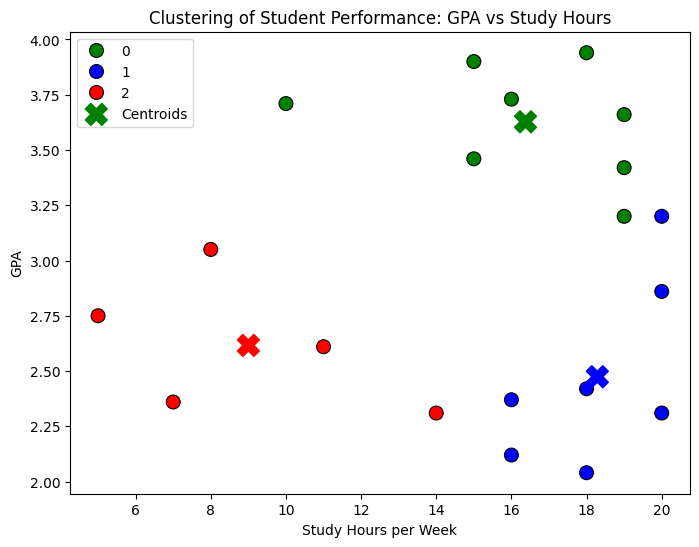

In [40]:
# 11. Visualisasi: Scatter Plot (Study Hours vs GPA) dengan titik pusat cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x="Study_Hours", y="GPA",
                hue="Cluster", palette=cluster_palette, s=100, edgecolor="k")
plt.scatter(centers_df["Study_Hours"], centers_df["GPA"],
            s=250, c=[cluster_palette[i] for i in centers_df["Cluster"]], marker="X", label="Centroids")
plt.title("Clustering of Student Performance: GPA vs Study Hours")
plt.xlabel("Study Hours per Week")
plt.ylabel("GPA")
plt.legend()
plt.show()

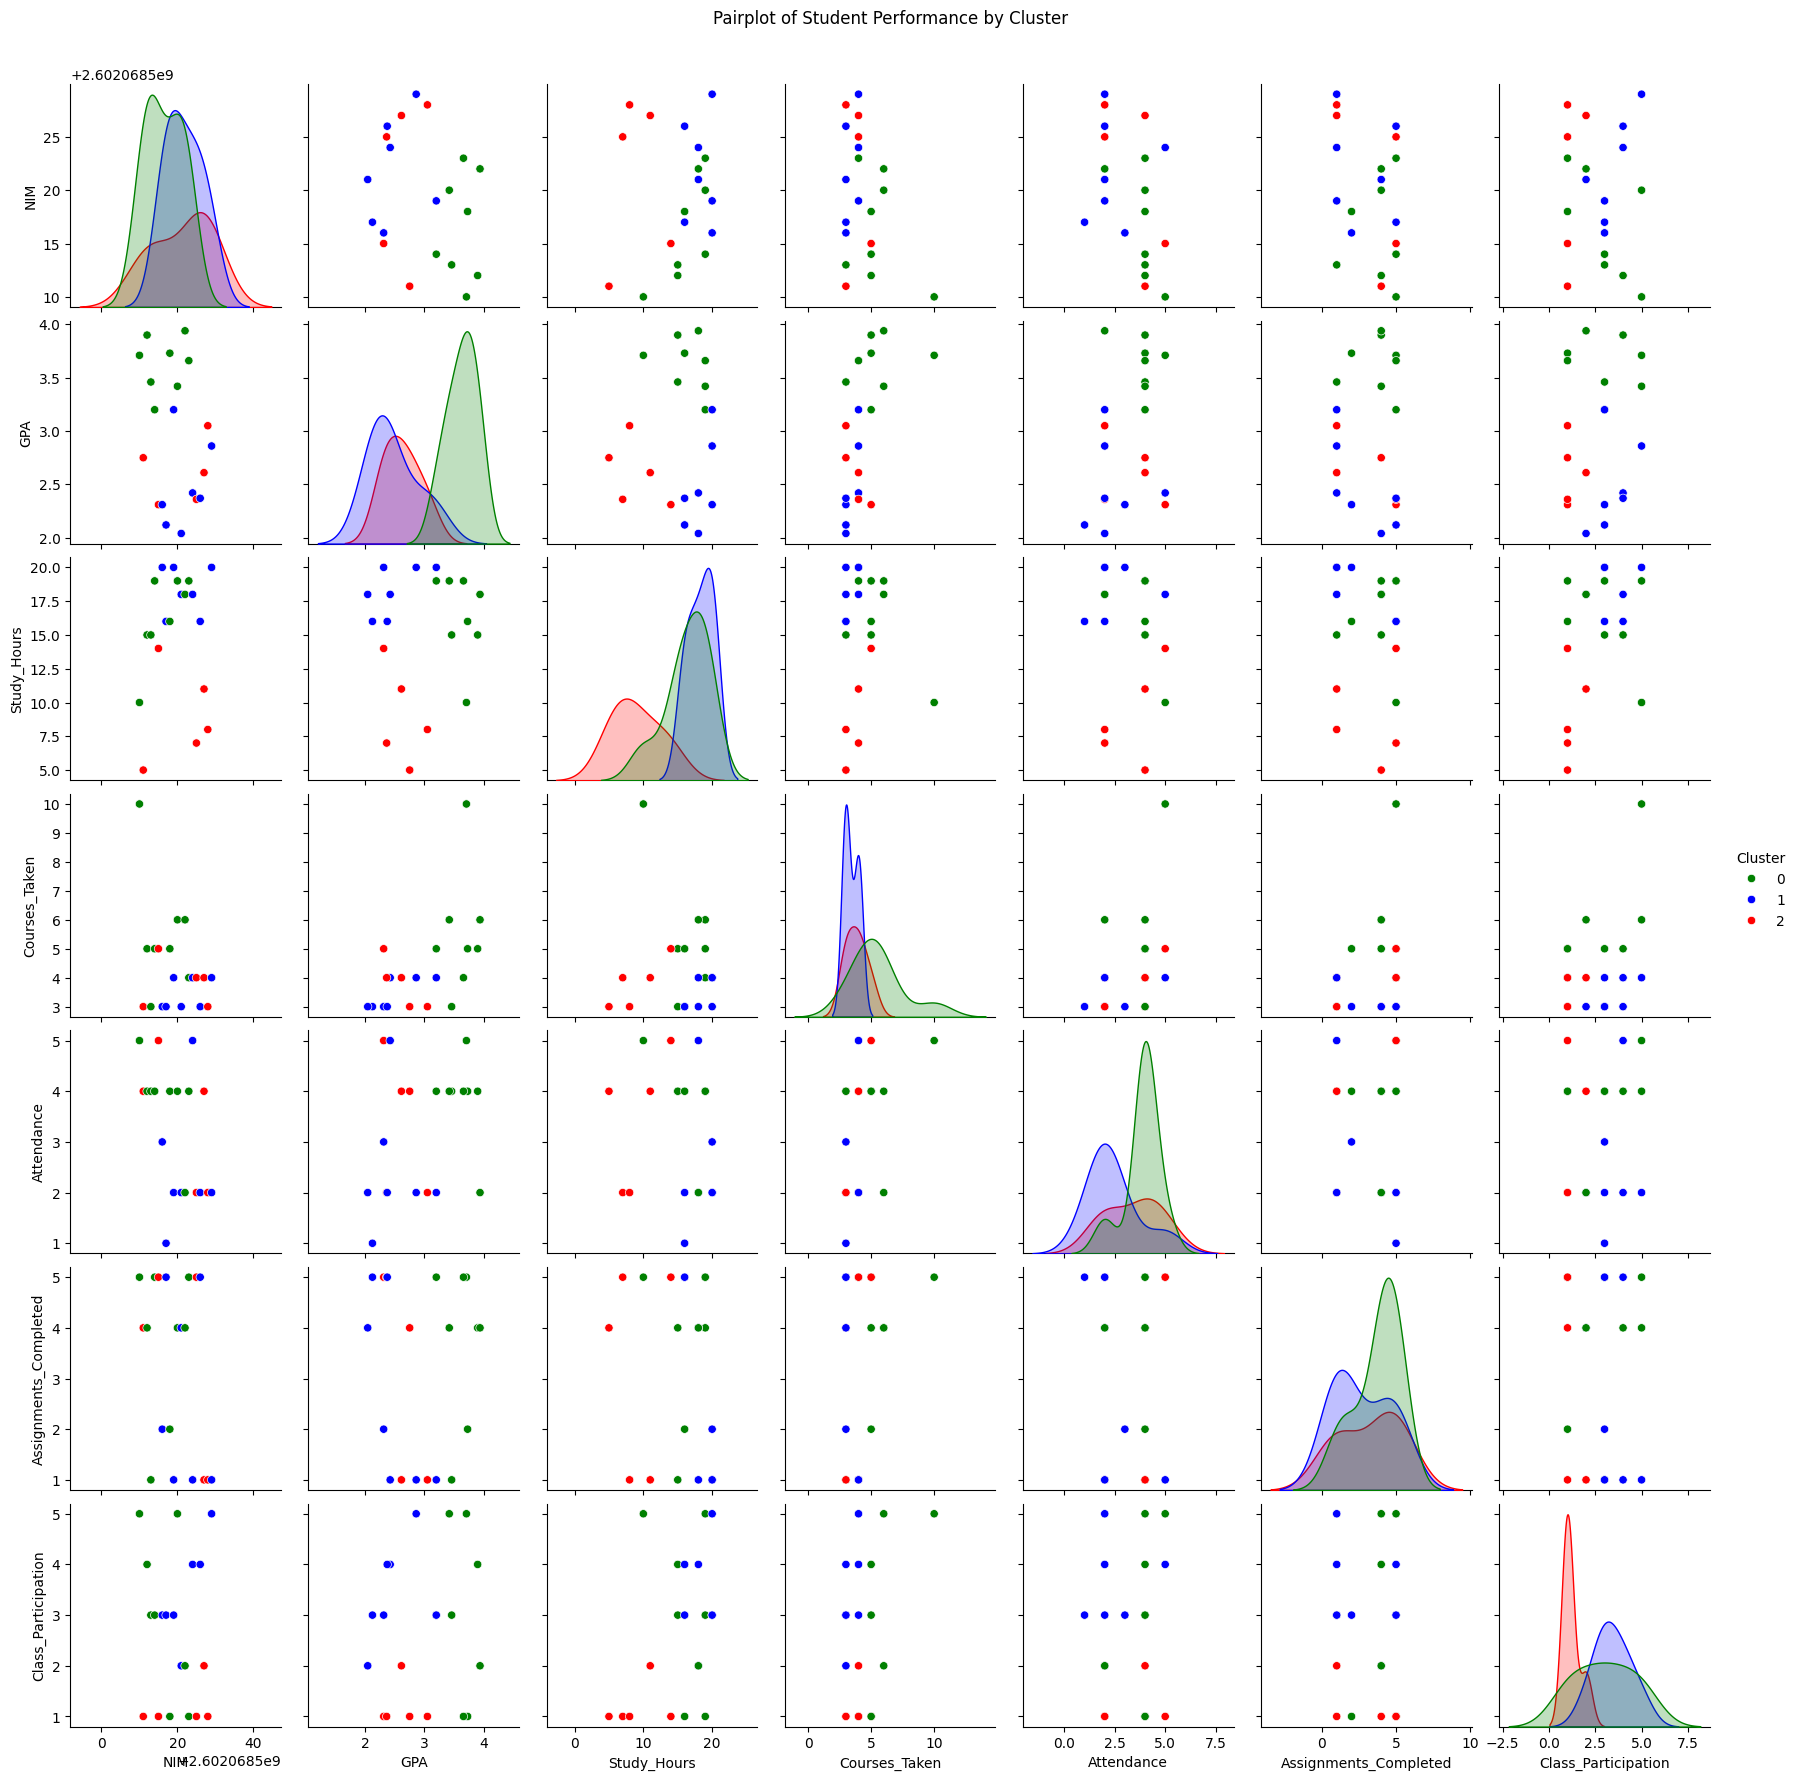

In [41]:
# 12. Visualisasi: Pairplot untuk semua fitur berdasarkan cluster
sns.pairplot(df_clean, hue="Cluster", palette=cluster_palette, diag_kind="kde")
plt.suptitle("Pairplot of Student Performance by Cluster", y=1.02)
plt.show()

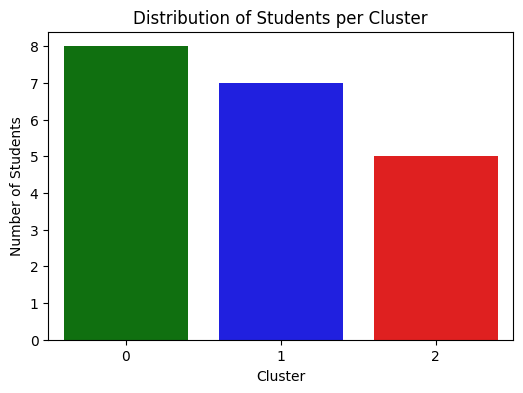

In [60]:
# 12. Visualisasi: Bar Chart Distribusi Jumlah Mahasiswa per Cluster
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x="Cluster", hue="Cluster", palette=cluster_palette, legend=False)
plt.title("Distribution of Students per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Students")
plt.show()

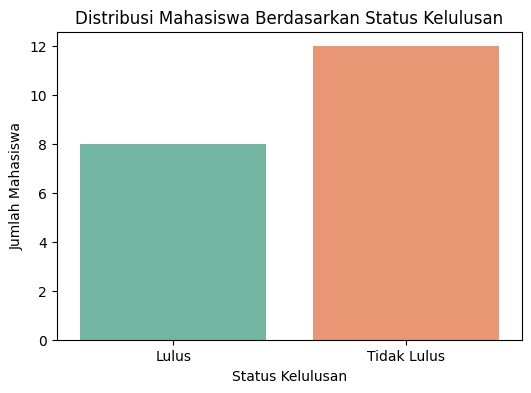

In [64]:
# 14. Visualisasi: Bar Chart Distribusi Status Kelulusan
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='Status Kelulusan', hue= 'Status Kelulusan', palette='Set2')
plt.title('Distribusi Mahasiswa Berdasarkan Status Kelulusan')
plt.xlabel('Status Kelulusan')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

In [54]:
# 14. Menampilkan tabel mahasiswa yang berpotensi lulus dan tidak lulus
mahasiswa_lulus = df_clean[df_clean['Status Kelulusan'] == 'Lulus']
mahasiswa_tidak_lulus = df_clean[df_clean['Status Kelulusan'] == 'Tidak Lulus']

print("Mahasiswa Berpotensi Lulus:")
print(mahasiswa_lulus)

print("\nMahasiswa Berpotensi Tidak Lulus:")
print(mahasiswa_tidak_lulus)

Mahasiswa Berpotensi Lulus:
              Nama         NIM   GPA  Study_Hours  Courses_Taken  Attendance  \
0   Fedry Alvindra  2602068510  3.71           10             10           5   
1             Adit  2602068511  2.75            5              3           4   
2             Budi  2602068512  3.90           15              5           4   
3            Citra  2602068513  3.46           15              3           4   
4             Dewi  2602068514  3.20           19              5           4   
8             Hadi  2602068518  3.73           16              5           4   
10            Joko  2602068520  3.42           19              6           4   
13           Maman  2602068523  3.66           19              4           4   

    Assignments_Completed  Class_Participation  Cluster Status Kelulusan  
0                       5                    5        0            Lulus  
1                       4                    1        2            Lulus  
2                       4 

In [55]:
# Tampilkan pusat cluster pada skala asli untuk referensi
print("Cluster Centers (in original scale):")
print(centers_df)

Cluster Centers (in original scale):
        GPA  Study_Hours  Courses_Taken  Attendance  Assignments_Completed  \
0  3.627500    16.375000       5.500000    3.875000               3.750000   
1  2.474286    18.285714       3.428571    2.428571               2.714286   
2  2.616000     9.000000       3.800000    3.400000               3.200000   

   Class_Participation  Cluster  
0             3.000000        0  
1             3.428571        1  
2             1.200000        2  
